# Regularized logistic regression

In this homework, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.  
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os

#### Visualizing the data

In [2]:
path = os.getcwd() + '\data\ex2data2.txt'
data = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted']) 
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Text(0.5, 1.0, 'Plot of training data.')

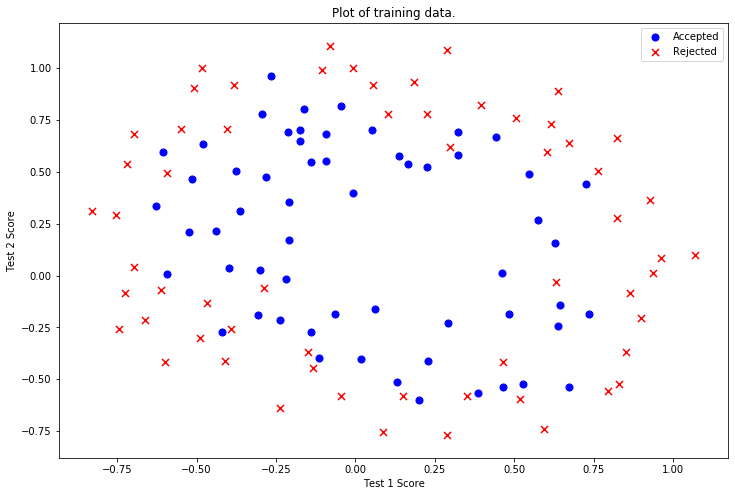

In [3]:
positive = data[data['Accepted'].isin([1])]
negative = data[data['Accepted'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
ax.set_title('Plot of training data.')


#### Feature mapping

In [4]:
degree = 6
x1 = data['Test 1']
x2 = data['Test 2']
data.insert(3, 'Ones', 1)

for i in range(1, degree+1):
    for j in range(0, i+1):
        data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)    
        
data.drop('Test 1', axis=1, inplace=True)
data.drop('Test 2', axis=1, inplace=True)

data.head()

,Accepted,Ones,F10,F11,F20,F21,F22,F30,F31,F32,...,F53,F54,F55,F60,F61,F62,F63,F64,F65,F66
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


#### Cost function and gradient

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg


def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    return grad    


In [6]:
# set X and y (remember from above that we moved the label to column 0)
cols = data.shape[1]
X = data.iloc[:,1:cols]
y = data.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(X.shape[1])

In [7]:
learningRate = 1

In [8]:
costReg(theta, X, y, learningRate)

0.6931471805599454

In [9]:
gradientReg(theta, X, y, learningRate)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

#### Learning parameters using SciPy

In [10]:
import scipy.optimize as opt

result = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X, y, learningRate))
result

(array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.9174319 ,
        -1.43166929,  0.12393227, -0.36553118, -0.35725403, -0.17516291,
        -1.45817009, -0.05098418, -0.61558554, -0.27469165, -1.19271298,
        -0.2421784 , -0.20603299, -0.04466178, -0.2777895 , -0.29539514,
        -0.45645981, -1.04319154,  0.02779373, -0.2924487 ,  0.0155576 ,
        -0.32742405, -0.1438915 , -0.92467487]), 32, 1)

#### Plotting the decision boundary

In [11]:
###hw3
###2.2.4 Evaluating logistic regression
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [12]:


theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) / len(correct))*100
print('accuracy = {0}%'.format(accuracy))


accuracy = 83.05084745762711%


Text(0.5, 1.0, 'lambda = 1')

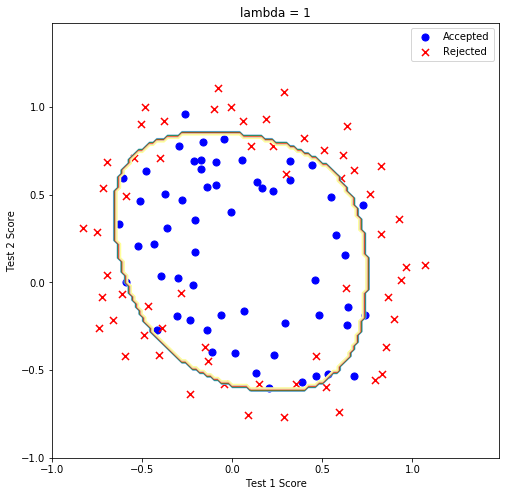

In [13]:
h=0.02 #step size in the mesh
#create a mesh to plot in
xx, yy = np.meshgrid(np.arange(-1, 1.5, h),np.arange(-1, 1.5, h))
X2_plot = np.ones(xx.ravel().shape[0]).ravel()
for i in range(1,degree+1):
    for j in range(0,i+1):
        term = np.power(xx.ravel(),i-j) * np.power(yy.ravel(), j)
        X2_plot = np.c_[X2_plot, term.ravel()]

Z = predict(theta_min, X2_plot)

Z = np.matrix(Z).reshape(xx.shape)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.contour(xx, yy, Z, cmap=plt.cm.Paired)
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
ax.set_title('lambda = {}'.format(learningRate))

#### Different regularization parameters
- No regularization (Overfitting) (lambda = 0).
- Too much regularization (Underfitting) (lambda = 100).

accuracy = 86.4406779661017%


Text(0.5, 1.0, 'lambda = 0')

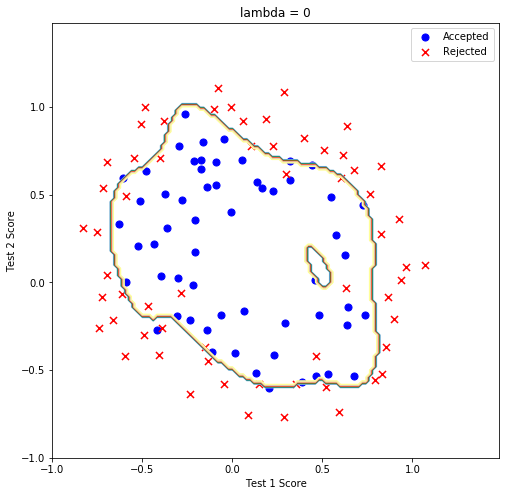

In [14]:
learningRate = 0


result = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X, y, learningRate))
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) / len(correct))*100
print('accuracy = {0}%'.format(accuracy))
h=0.02 #step size in the mesh
#create a mesh to plot in
xx, yy = np.meshgrid(np.arange(-1, 1.5, h),np.arange(-1, 1.5, h))
X2_plot = np.ones(xx.ravel().shape[0]).ravel()
for i in range(1,degree+1):
    for j in range(0,i+1):
        term = np.power(xx.ravel(),i-j) * np.power(yy.ravel(), j)
        X2_plot = np.c_[X2_plot, term.ravel()]

Z = predict(theta_min, X2_plot)

Z = np.matrix(Z).reshape(xx.shape)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.contour(xx, yy, Z, cmap=plt.cm.Paired)
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
ax.set_title('lambda = {}'.format(learningRate))

accuracy = 61.016949152542374%


Text(0.5, 1.0, 'lambda = 100')

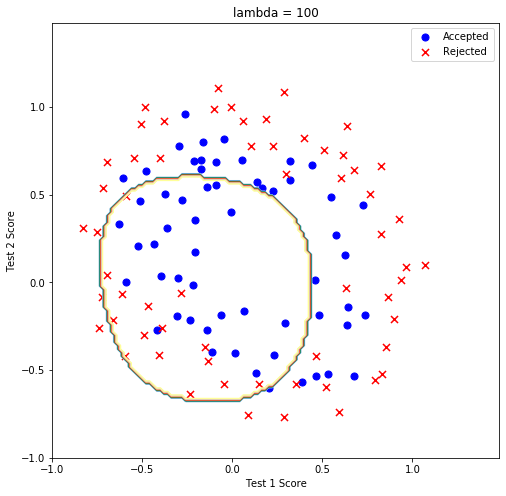

In [15]:
learningRate = 100


result = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X, y, learningRate))
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) / len(correct))*100
print('accuracy = {0}%'.format(accuracy))
h=0.02 #step size in the mesh
#create a mesh to plot in
xx, yy = np.meshgrid(np.arange(-1, 1.5, h),np.arange(-1, 1.5, h))
X2_plot = np.ones(xx.ravel().shape[0]).ravel()
for i in range(1,degree+1):
    for j in range(0,i+1):
        term = np.power(xx.ravel(),i-j) * np.power(yy.ravel(), j)
        X2_plot = np.c_[X2_plot, term.ravel()]

Z = predict(theta_min, X2_plot)

Z = np.matrix(Z).reshape(xx.shape)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.contour(xx, yy, Z, cmap=plt.cm.Paired)
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
ax.set_title('lambda = {}'.format(learningRate))

## 問題討論
### 如何選擇最佳lambda

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in multiply


(0, 10)

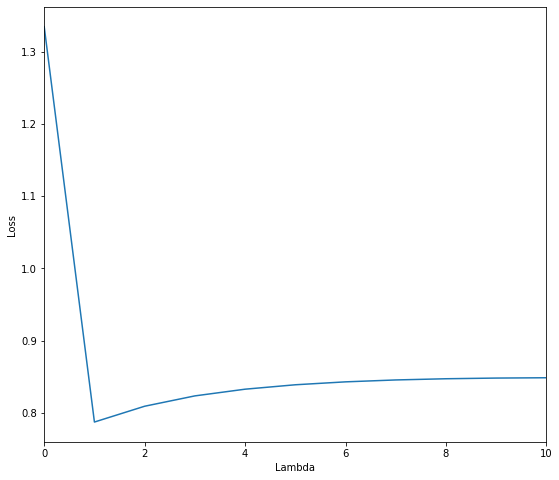

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os

path = os.getcwd() + '\data\ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted']) 
data2.head()

positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]


degree = 6
x1 = data2['Test 1']
x2 = data2['Test 2']
data2.insert(3, 'Ones', 1)
for i in range(1, degree+1):
    for j in range(0, i+1):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)        
data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)
data2.head()


###sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

###

def costReg(theta, X, y, learningRate,reg_on=0):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)    
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        if (i == 0):
            grad[i] = np.sum(term) / len(X)        
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    return grad
    
data2 = data2.sample(frac=1)
# set X and y (remember from above that we moved the label to column 0)
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
#theta2 = np.zeros(28)




train_ind = int(X2.shape[0]*0.7)
val_ind = int(X2.shape[0]*0.2)
X2_train = X2[0:train_ind, :]
y2_train = y2[0:train_ind, :]
X2_val = X2[train_ind:train_ind+val_ind, :]
y2_val = y2[train_ind:train_ind+val_ind, :]
X2_test = X2[train_ind+val_ind:, :]
y2_test = y2[train_ind+val_ind:, :]




learningRate = np.arange(0, 10, 0.1)
loss = np.zeros(learningRate.shape[0]) 
theta_all=[]


import scipy.optimize as opt
for i in range(learningRate.shape[0]):
    theta2 = np.zeros(X2.shape[1])
    result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2_train, y2_train, learningRate[i]))
    theta_min = np.matrix(result2[0])
    loss[i]=costReg(theta_min, X2_val, y2_val, learningRate[i],reg_on=0)
    theta_all.append(theta_min.ravel())
    
fig,ax = plt.subplots(figsize=(9,8))
ax.plot(loss)
ax.set_xlabel('Lambda')
ax.set_ylabel('Loss')
ax.set_xlim(0,10)





C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in multiply


(0, 2)

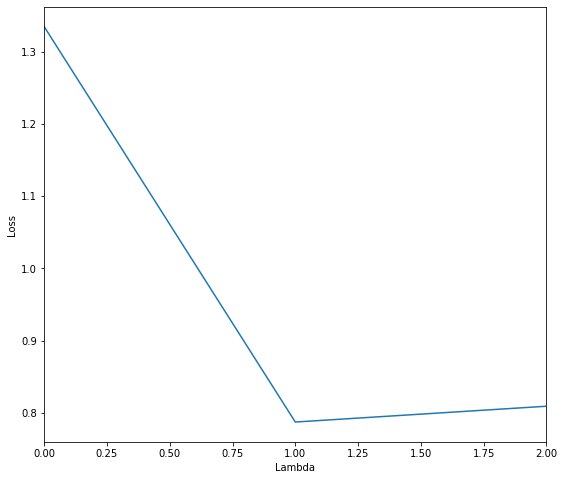

In [17]:
import scipy.optimize as opt
for i in range(learningRate.shape[0]):
    theta2 = np.zeros(X2.shape[1])
    result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2_train, y2_train, learningRate[i]))
    theta_min = np.matrix(result2[0])
    loss[i]=costReg(theta_min, X2_val, y2_val, learningRate[i],reg_on=0)
    theta_all.append(theta_min.ravel())
    
fig,ax = plt.subplots(figsize=(9,8))
ax.plot(loss)
ax.set_xlabel('Lambda')
ax.set_ylabel('Loss')
ax.set_xlim(0,2)

由圖可知 最佳lambda = 1